<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

# Movie Industry

This is a project done on a kaggle dataset containing information on 7668 movies. The release years for these movies ranges from 1980-2020. 

### Link to Project Description: [Kaggle Movie Industry Data](https://www.kaggle.com/datasets/danielgrijalvas/movies)

<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">
    
## Load our packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import cpi
from matplotlib.pyplot import figure
sns.set(color_codes=True)
%matplotlib inline
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
#to see all the rows we can use the following:
#pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

## Load data and take a quick glance

In [5]:
# Loading in our data

df = pd.read_csv('movies.csv')

In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [8]:
df.describe(include = 'object')

,name,rating,genre,released,director,writer,star,country,company
count,7668,7591,7668,7666,7668,7665,7667,7665,7651
unique,7512,12,19,3414,2949,4535,2814,59,2385
top,Nobody's Fool,R,Comedy,"February 14, 1986 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3,3697,2245,9,38,37,43,5475,377


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'score'}>],
       [<AxesSubplot:title={'center':'votes'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'runtime'}>]], dtype=object)

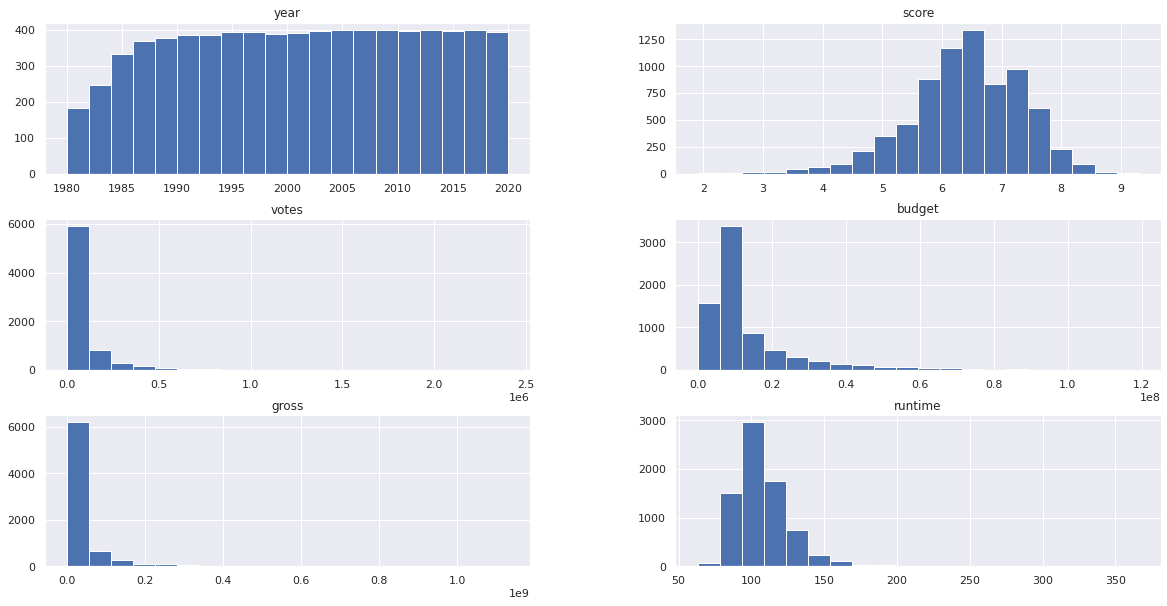

In [158]:
df.hist(figsize=(20,10), bins=20)

<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 15px;">

## Observation and Data Related Questions

- Gross revenue appears to be a good variable of interest for exploring some questions.
- To control for inflation, we will convert all of the budget and gross revenue values to the standard value of the dollar from 1980 using Consumer Price Index(CPI) data.

- Questions we can explore using this data: 
    1. What are 10 highest grossing movies from 1980 - 2020?
    2. Are number of votes, budget, year released, and runtime associated with the gross revenue of a movie?
    3. Which genres of movies have the highest revenue in our data set? 
    4. Which ratings of movies have the highest revenue in our data set? 
    5. Which directors and stars have brought in the highest revenue? 
    6. Which countries and production companies have the highest revenue?

In [161]:
# Adjusting for inflation
#pip install cpi
from cpi import inflate

# Adjust 'gross' and 'budget' to 1980 dollars
df['gross'] = df.apply(lambda row: inflate(row['gross'], row['year'], to=1980), axis=1)
df['budget'] = df.apply(lambda row: inflate(row['budget'], row['year'], to=1980), axis=1)


<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

## First, we will clean the data.

In [13]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

print('total number of observations in our data:', len(df))

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {} - {}%'.format(col, df[col].isnull().sum(), round(pct_missing*100, 3)))
    

total number of observations in our data: 7668
name - 0 - 0.0%
rating - 77 - 1.004%
genre - 0 - 0.0%
year - 0 - 0.0%
released - 2 - 0.026%
score - 3 - 0.039%
votes - 3 - 0.039%
director - 0 - 0.0%
writer - 3 - 0.039%
star - 1 - 0.013%
country - 3 - 0.039%
budget - 2171 - 28.312%
gross - 189 - 2.465%
company - 17 - 0.222%
runtime - 4 - 0.052%


<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 15px;">

It looks like we have bunch of missing data. 
- For columns where the percentage of missing data is less than 5%, we will drop those observations. 
- For the one column with greater than 5% missing data, we will use the **mean or median** value to replace the missing data.

<AxesSubplot:>

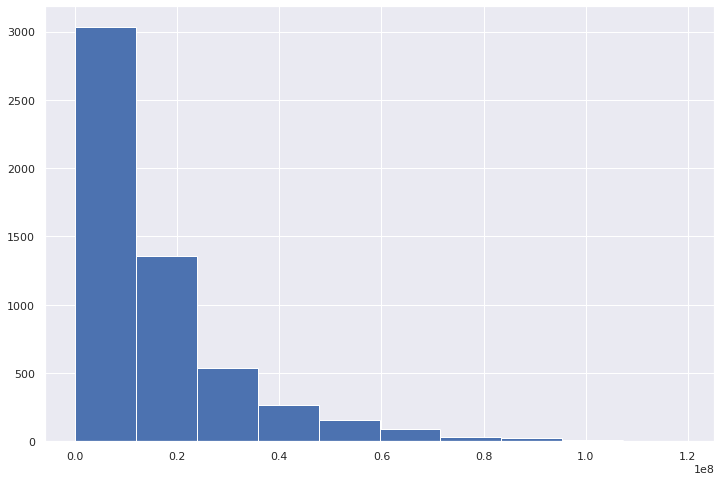

In [15]:
# Look at the distribution to decide if we are going to use the mean or median

df['budget'].hist()

In [16]:
# Replace missing data for budget by median value since it is not normally distributed.

median_value = df['budget'].median()
df['budget'].fillna(median_value, inplace=True)

In [17]:
# We create a for loop to delete observations from columns where the percentage of missing data is less than 5%

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if round(pct_missing*100, 3) < 5:
        df.dropna(inplace=True)

In [18]:
# Check again to verify we have dealt with all of the missing data

for col in df.columns:
    print('{} - {}'.format(col, df[col].isnull().sum()))

name - 0
rating - 0
genre - 0
year - 0
released - 0
score - 0
votes - 0
director - 0
writer - 0
star - 0
country - 0
budget - 0
gross - 0
company - 0
runtime - 0


In [19]:
# I also noticed that there are two year related columns. One just has the year, and the other also has the month of release.
# If we also want to look at months of realease in our data exploration, we can extract that as follows: 

df['month'] = df['released'].astype(str).str.split().str[0]

df['month'].unique()

array(['June', 'July', 'May', 'December', 'October', 'September',
       'February', 'April', 'August', 'March', 'January', 'November',
       '1982', '1985', '1987', '1995', '2019', '2013'], dtype=object)

In [20]:
# Let's deal with the rows where we got years instead of the month

selected_years = ['1982', '1985', '1987', '1995', '2019', '2013']
filtered_df = df[df['month'].isin(selected_years)]
filtered_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
312,Five Days One Summer,PG,Drama,1982,1982 (Japan),6.1,1000.0,Fred Zinnemann,Michael Austin,Sean Connery,United States,1.280829e+07,1.699899e+05,Cable and Wireless Finance,108.0,1982
786,Taipei Story,Not Rated,Drama,1985,1985 (Taiwan),7.7,2500.0,Edward Yang,T'ien-wen Chu,Chin Tsai,Taiwan,1.054788e+07,2.706028e+04,Evergreen Film Company,119.0,1985
800,O.C. and Stiggs,R,Comedy,1985,1985 (United States),5.4,1200.0,Robert Altman,Tod Carroll,Daniel Jenkins,United States,5.360595e+06,2.283230e+04,Metro-Goldwyn-Mayer (MGM),109.0,1985
1173,The House on Carroll Street,PG,Thriller,1987,1987 (United States),6.1,2300.0,Peter Yates,Walter Bernstein,Kelly McGillis,United States,1.015493e+07,3.335343e+05,Orion Pictures,101.0,1987
2816,The White Balloon,Unrated,Drama,1995,1995 (Iran),7.7,6900.0,Jafar Panahi,Abbas Kiarostami,Aida Mohammadkhani,Iran,8.110236e+04,5.000988e+05,Farabi Cinema Foundation,85.0,1995
4187,Dahmer,R,Biography,2002,2019 (United States),5.6,9700.0,David Jacobson,David Birke,Jeremy Renner,United States,1.145081e+05,6.596031e+04,Blockbuster Films,101.0,2019
6413,Romeo and Juliet,PG-13,Drama,2013,2013 (United States),5.8,11000.0,Carlo Carlei,Arthur Brooke,Hailee Steinfeld,United Kingdom,1.054788e+07,1.049209e+06,Amber Entertainment,118.0,2013


In [21]:
# Replace with unknown

df.loc[df['month'].isin(selected_years), 'month'] = 'Unknown'

In [22]:
df['month'].unique()

array(['June', 'July', 'May', 'December', 'October', 'September',
       'February', 'April', 'August', 'March', 'January', 'November',
       'Unknown'], dtype=object)

In [23]:
len(df)

7412

In [146]:
#Check to drop dublicates if any. There are none in our case since the number of rows stays the same.

print(df.duplicated().sum())

0


In [25]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
month        object
dtype: object


<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

## Ready to explore our questions

<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 15px;">

### 1. What are 10 highest grossing movies from 1980 - 2020?

- **From our analysis, we see that Titanic, released in 1997, is the movie with the highest gross.**

In [28]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,1.026791e+08,1.130316e+09,Twentieth Century Fox,194.0,December
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,9.102765e+07,1.093579e+09,Twentieth Century Fox,162.0,December
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,1.147412e+08,9.016538e+08,Marvel Studios,181.0,April
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,8.517532e+07,7.194783e+08,Lucasfilm,138.0,December
209,E.T. the Extra-Terrestrial,PG,Family,1982,"June 11, 1982 (United States)",7.8,381000.0,Steven Spielberg,Melissa Mathison,Henry Thomas,United States,8.965803e+06,6.770552e+08,Universal Pictures,115.0,June
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,1.053352e+08,6.721630e+08,Marvel Studios,149.0,April
2448,The Lion King,G,Animation,1994,"June 24, 1994 (United States)",8.5,970000.0,Roger Allers,Irene Mecchi,Matthew Broderick,United States,2.502024e+07,6.025547e+08,Walt Disney Pictures,88.0,June
2245,Jurassic Park,PG-13,Action,1993,"June 11, 1993 (United States)",8.1,894000.0,Steven Spielberg,Michael Crichton,Sam Neill,United States,3.592526e+07,5.895896e+08,Universal Pictures,127.0,June
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,5.214816e+07,5.807624e+08,Universal Pictures,124.0,June
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,7.895677e+07,5.450944e+08,Marvel Studios,143.0,May


<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 15px;">

### 2. Are number of votes, score, budget, year released, and runtime associated with the gross revenue of a movie?

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'score'}>],
       [<AxesSubplot:title={'center':'votes'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'runtime'}>]], dtype=object)

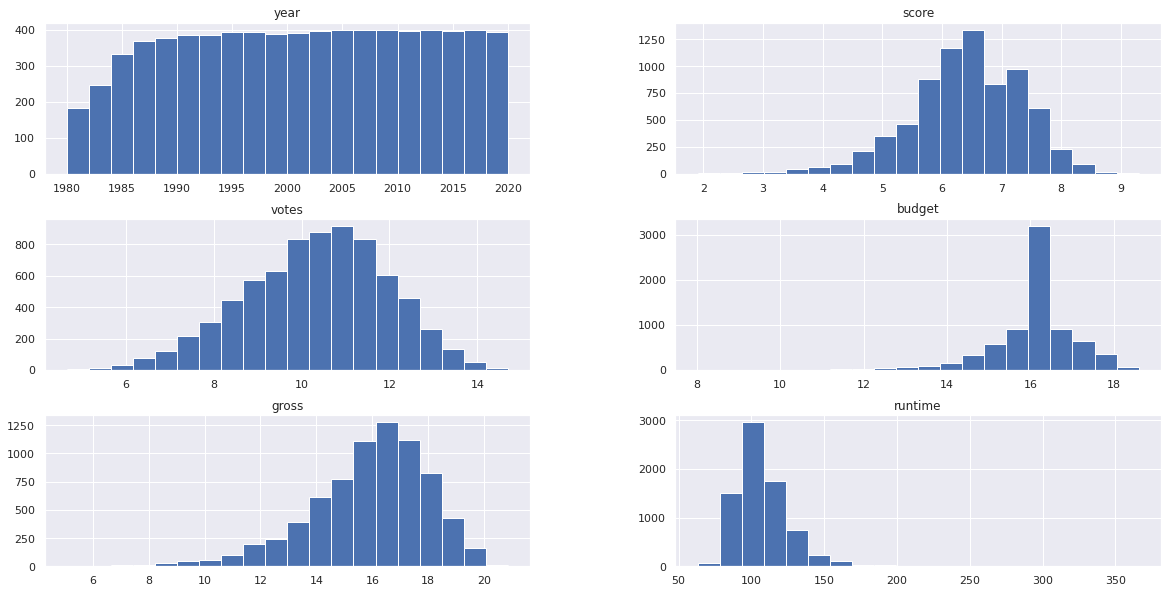

In [30]:
# For this part we will do a log transformation to the features: gross, budget, and votes. 
# to meet normal distribution requirements. 

df_transformed = df.copy()
df_transformed['gross'] = np.log1p(df['gross'])
df_transformed['budget'] = np.log1p(df['budget'])
df_transformed['votes'] = np.log1p(df['votes'])

df_transformed.hist(figsize=(20,10), bins=20)

In [165]:
# Correlation Matrix between all numeric columns

df_transformed.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.093951,0.468792,0.050501,0.121351,0.114237
score,0.093951,1.000000,0.439317,-0.009801,0.127476,0.397226
votes,0.468792,0.439317,1.000000,0.249498,0.637430,0.283297
budget,0.050501,-0.009801,0.249498,1.000000,0.427519,0.275086
gross,0.121351,0.127476,0.637430,0.427519,1.000000,0.212162
runtime,0.114237,0.397226,0.283297,0.275086,0.212162,1.000000


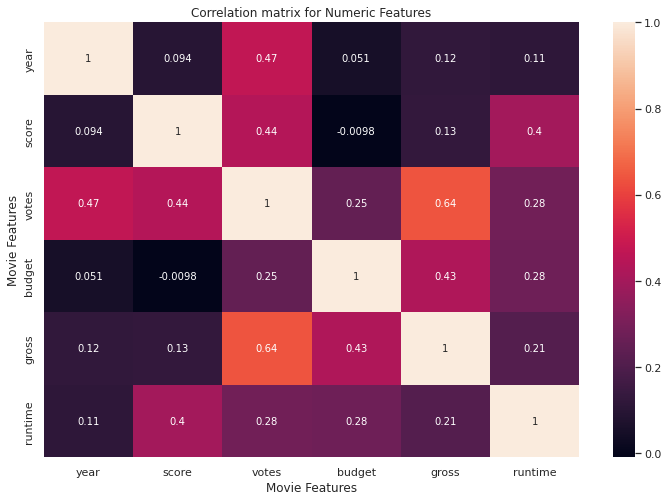

In [167]:
# Let's visualize this using a heatmap

correlation_matrix = df_transformed.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 15px;">

- Observations: It seems like number of votes and budget are the variables most strongly associated with gross revenue. 
- We will explore these two variables further.

<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 15px;">

#### Budget vs Gross Revenue

- **From our analysis, it seems like movies with higher budgets tend to also have higher gross revenue as shown from our correlation analysis.**

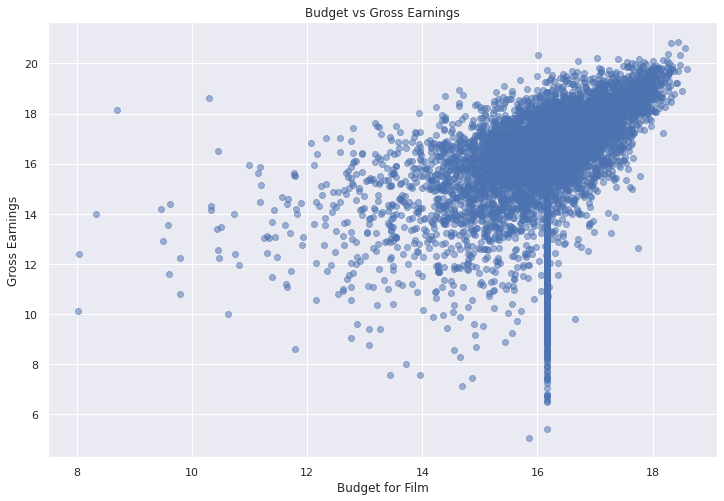

In [35]:
# Let's visualize the relationship between the budget and the gross revnue of a movie. 

plt.scatter(x='budget', y='gross', data= df_transformed, alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

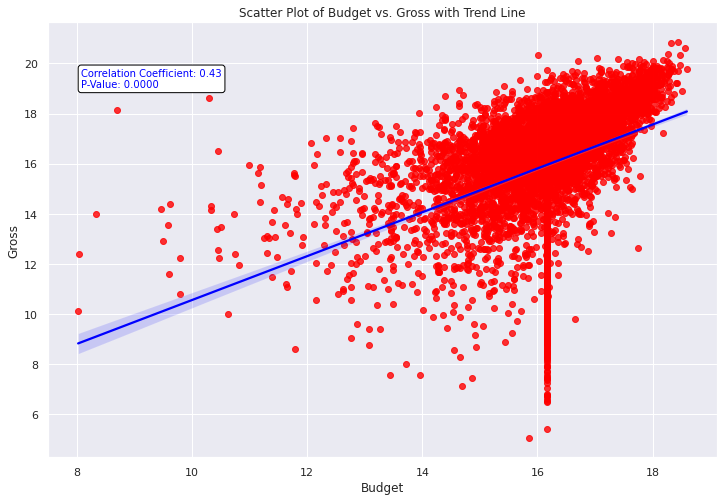

In [36]:
#Add best fit line for better understanding of trends

ax = sns.regplot(x="budget", y="gross", data=df_transformed, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Scatter Plot of Budget vs. Gross with Trend Line')


correlation_coefficient, p_value = pearsonr(df_transformed['budget'], df_transformed['gross'])

# Add correlation coefficient and p-value to the plot
ax.annotate(f"Correlation Coefficient: {correlation_coefficient:.2f}\nP-Value: {p_value:.4f}",
            xy=(0.05, 0.85), xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
            fontsize=10, color='blue');

<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 15px;">
    
- Here we also run a linear regression. 
- There are assumptions from our data that need to be checked to run a linear regression such as: 
    - linearity, normally distributed residuals, homoscedasticity etc. 
- For the sake of keeping this document brief, I will be checking only the three assumptions mentioned above. 

In [38]:
import statsmodels.api as sm

def run_lin_reg_check_assumptions(df, indep, dep):
    x = df[indep]
    y = df[dep]
    X = sm.add_constant(x)
    model = sm.OLS(y, X)
    result = model.fit()# Check for normality of residuals
    residuals = result.resid
    
    print(result.summary())
    
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.show()

    # Check for homoscedasticity with trend line
    sns.scatterplot(result.fittedvalues, residuals)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted Values with Trend Line')
    sns.lineplot(x=result.fittedvalues, y=0, color='red', linestyle='--')  # Trend line at 0
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     1657.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:01:01   Log-Likelihood:                -15389.
No. Observations:                7412   AIC:                         3.078e+04
Df Residuals:                    7410   BIC:                         3.080e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8149      0.346      5.245      0.0

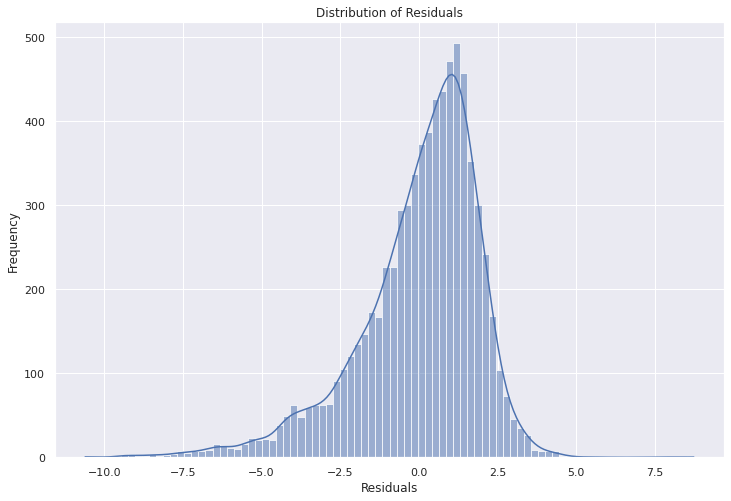

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


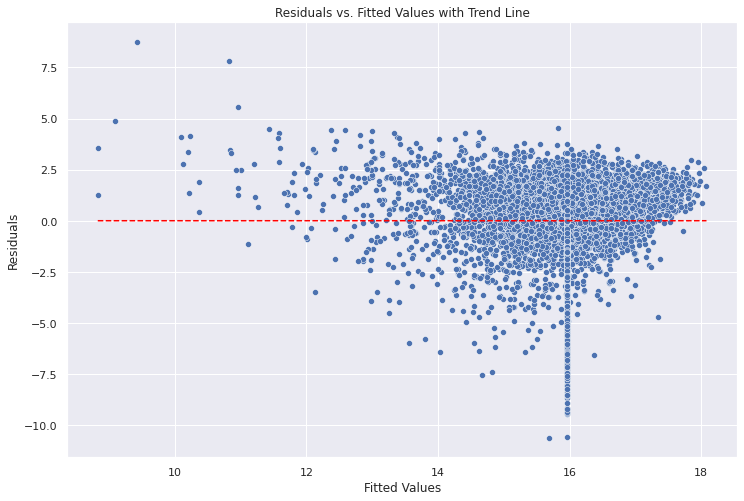

In [39]:
run_lin_reg_check_assumptions(df_transformed, 'budget', 'gross')

<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 15px;">

#### Votes vs Gross Revenue

- **From our analysis, it seems like movies with higher number of votes tend to also have higher gross revenue as shown from our correlation analysis.**

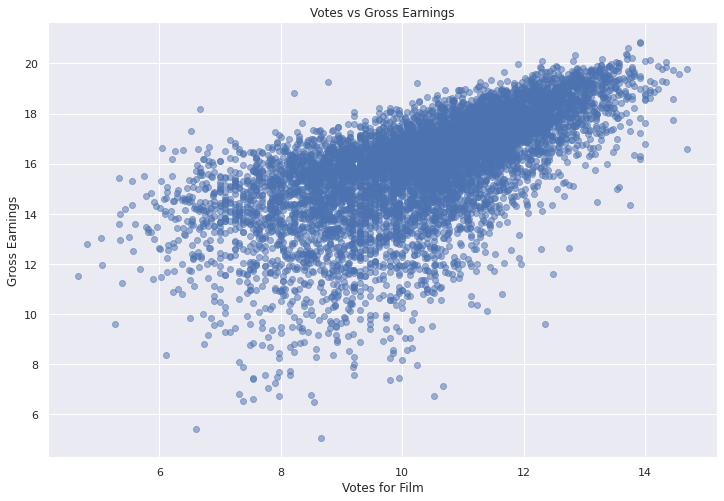

In [41]:
# Let's visualize the relationship between the number of votes and the gross earnings of a movie. 

plt.scatter(x='votes', y='gross', data= df_transformed, alpha=0.5)
plt.title('Votes vs Gross Earnings')
plt.xlabel('Votes for Film')
plt.ylabel('Gross Earnings')
plt.show()

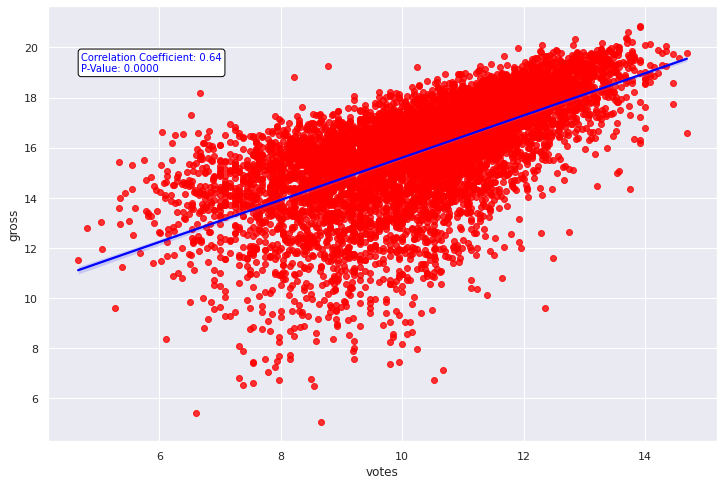

In [ ]:
ax = sns.regplot(x="votes", y="gross", data=df_transformed,  scatter_kws={'color':'red'}, line_kws={'color':'blue'})

correlation_coefficient, p_value = pearsonr(df_transformed['votes'], df_transformed['gross'])

# Add correlation coefficient and p-value to the plot
ax.annotate(f"Correlation Coefficient: {correlation_coefficient:.2f}\nP-Value: {p_value:.4f}",
            xy=(0.05, 0.85), xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
            fontsize=10, color='blue');

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     5071.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:01:22   Log-Likelihood:                -14205.
No. Observations:                7412   AIC:                         2.841e+04
Df Residuals:                    7410   BIC:                         2.843e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1864      0.123     58.207      0.0

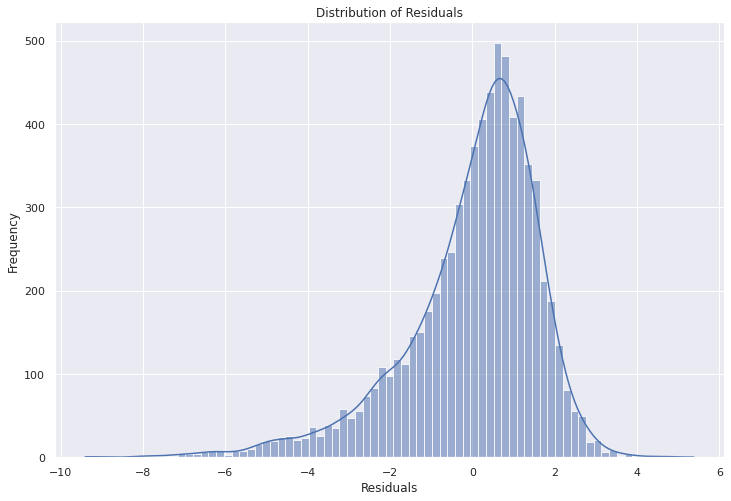

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


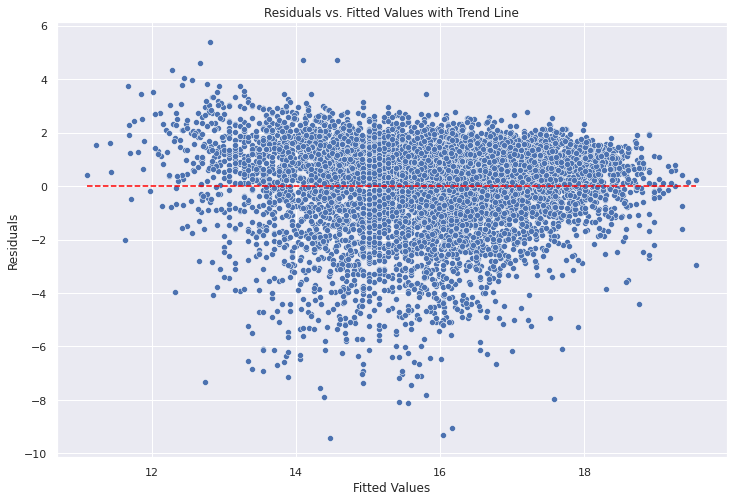

In [43]:
run_lin_reg_check_assumptions(df_transformed, 'votes', 'gross')

In [110]:

def plot_top_mean_total_gross(df, variable, top_n=15):
    # Calculate sum
    variable_gross_sum = df.groupby(variable)[['gross']].sum()
    variable_gross_sum_sorted = variable_gross_sum.sort_values('gross', ascending=False)[:top_n]

    # Plot bar chart for sum
    plt.figure(figsize=(10, 6))
    sns.barplot(x=variable_gross_sum_sorted.index, y='gross', data=variable_gross_sum_sorted, palette='viridis')
    plt.xlabel(variable.capitalize())
    plt.ylabel('Total Gross')
    if variable.endswith('y'):
        pluralized_variable = variable[:-1] + 'ies'
    else:
        pluralized_variable = variable + 's'
    plt.title(f'Top {top_n} {pluralized_variable.capitalize()} by Total Gross')
    plt.xticks(rotation=45, ha='right')
    
    # Calculate mean only for values in variables with count >= 3 because we don't want events with only one instance to bias our data
    variable_counts = df[variable].value_counts()

    eligible_categories = variable_counts[variable_counts >= 3].index

    variable_gross_mean = df[df[variable].isin(eligible_categories)].groupby(variable)[['gross']].mean()
    variable_gross_mean_sorted = variable_gross_mean.sort_values('gross', ascending=False)[:top_n]

    # Plot bar chart for mean
    plt.figure(figsize=(10, 6))
    sns.barplot(x=variable_gross_mean_sorted.index, y='gross', data=variable_gross_mean_sorted, palette='viridis')
    plt.xlabel(variable.capitalize())
    plt.ylabel('Mean Gross')
    
    plt.title(f'Top {top_n} {pluralized_variable.capitalize()} by Mean Gross (Count >= 3)')
    plt.xticks(rotation=45, ha='right')
    plt.show()


<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 15px;">

### 3. Which genres of movies have the highest revenue in our data set?

- **Looking at total gross values, it seems like Action movies are the highest earning in our data set.**
- **Looking average data, family and animation movies outperform action movies.**

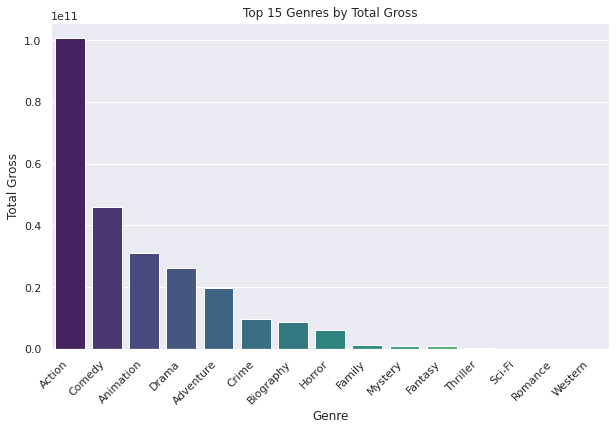

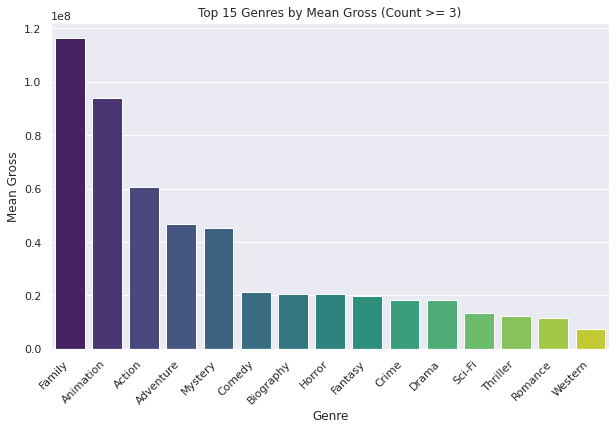

In [46]:
plot_top_mean_total_gross(df, 'genre', top_n=15)

<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 15px;">

### 4. Which rating-levels of movies have the highest revenue in our data set?

- **Looking at both gross and average values**

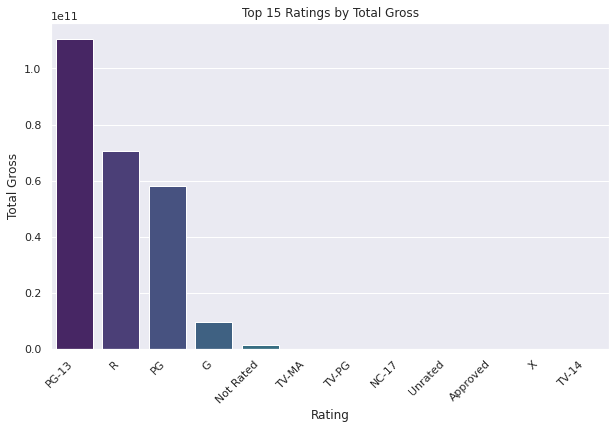

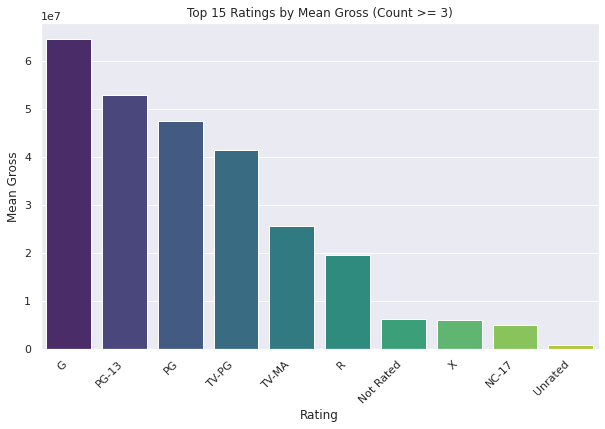

In [48]:
plot_top_mean_total_gross(df, 'rating', top_n=15)

<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 15px;">

### 5. Which directors and stars have brought in the highest revenue?

- **Looking at both gross and average values**

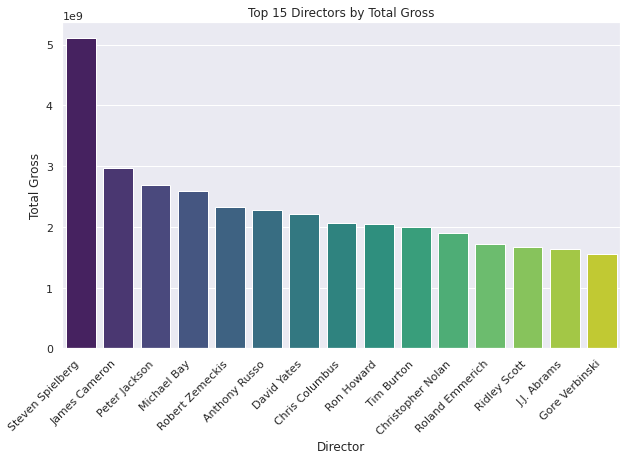

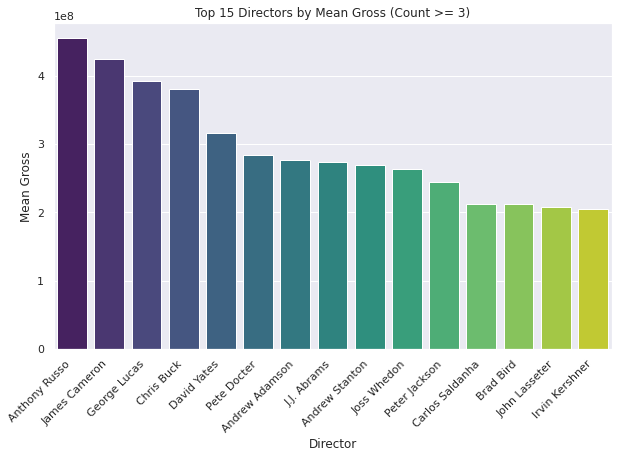

In [50]:
plot_top_mean_total_gross(df, 'director', top_n=15)

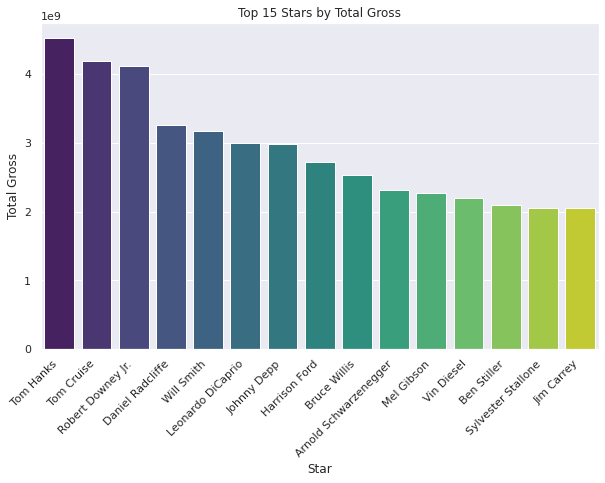

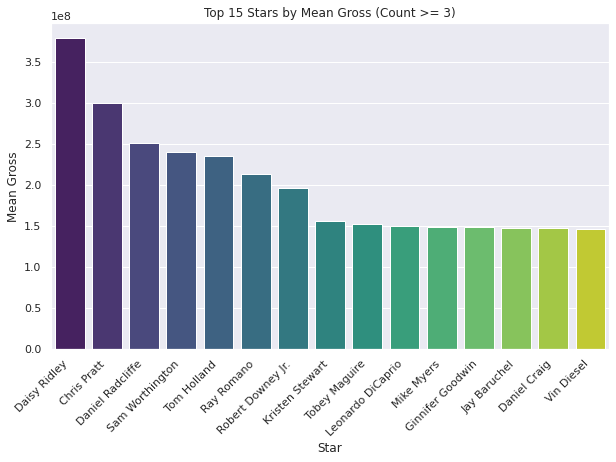

In [51]:
plot_top_mean_total_gross(df, 'star', top_n=15)

<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 15px;">

### 6. Which countries and production companies have the highest revenue?

- **Looking at both gross and average values**

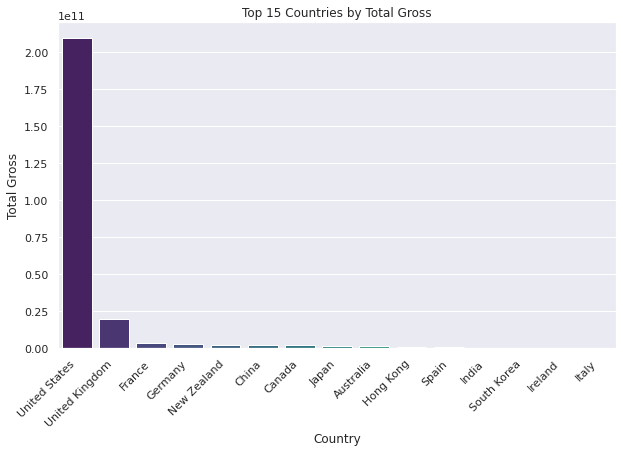

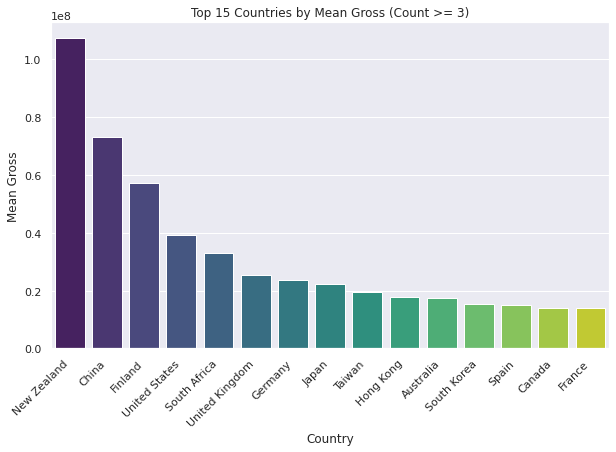

In [53]:
plot_top_mean_total_gross(df, 'country', top_n=15)

In [129]:
# Let's see what movies were made in New Zealand

df['name'][df['country'] == 'New Zealand']

445                                        Nate and Hayes
718                                       The Quiet Earth
1790                                 An Angel at My Table
2084                                           Dead Alive
2269                                            The Piano
2466                                   Heavenly Creatures
2500                                   Once Were Warriors
2876                                      The Frighteners
3845    The Lord of the Rings: The Fellowship of the Ring
4048                The Lord of the Rings: The Two Towers
4181                                          Whale Rider
4245        The Lord of the Rings: The Return of the King
4786                           The World's Fastest Indian
5013                                          Black Sheep
5179                                      The Water Horse
5216                                       Eagle vs Shark
5715                                                  Boy
5832          

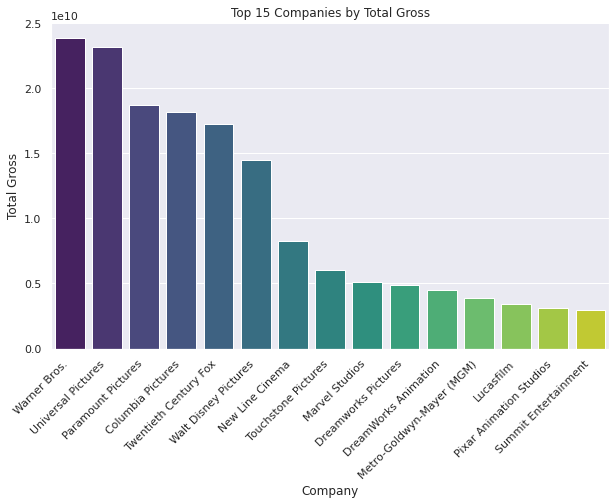

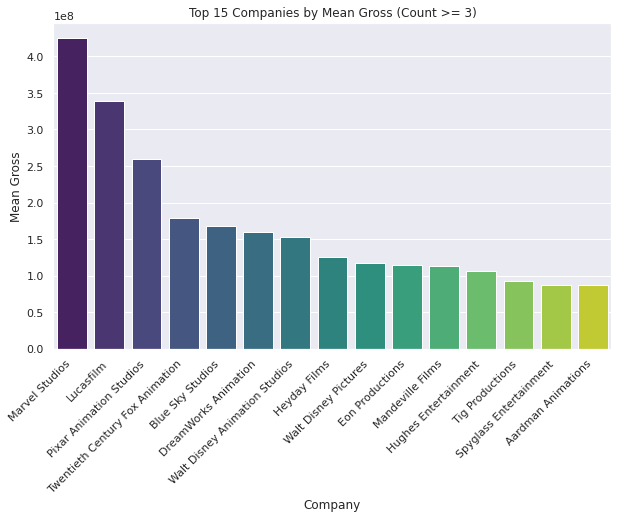

In [133]:
# Looking at the top 15 companies 

plot_top_mean_total_gross(df, 'company', top_n=15)

<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

## Finally let's look at trends by year and month

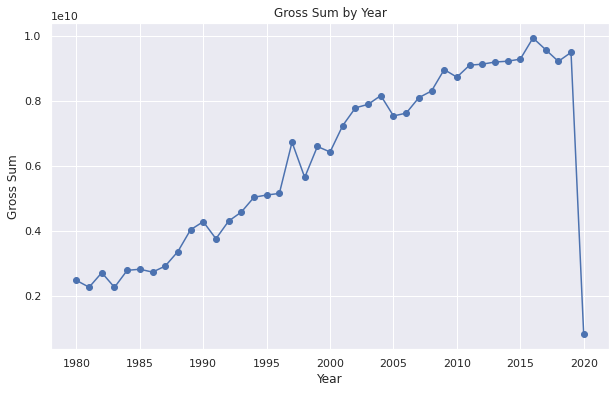

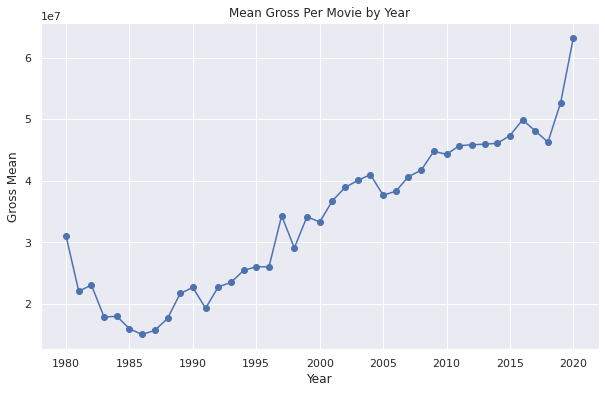

In [57]:
YearGrossSum = df.groupby('year')[["gross"]].sum()
YearGrossSumSorted = YearGrossSum.sort_values('gross', ascending = False)
YearGrossSumSorted

plt.figure(figsize=(10, 6))
plt.plot(YearGrossSum.index, YearGrossSum["gross"], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Gross Sum')
plt.title('Gross Sum by Year')

YearGrossMean = df.groupby('year')[["gross"]].mean()
YearGrossMeanSorted = YearGrossMean.sort_values('gross', ascending = False)
YearGrossMeanSorted

plt.figure(figsize=(10, 6))
plt.plot(YearGrossMean.index, YearGrossMean["gross"], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Gross Mean')
plt.title('Mean Gross Per Movie by Year')


# Display the plot
plt.grid(True)
plt.show()

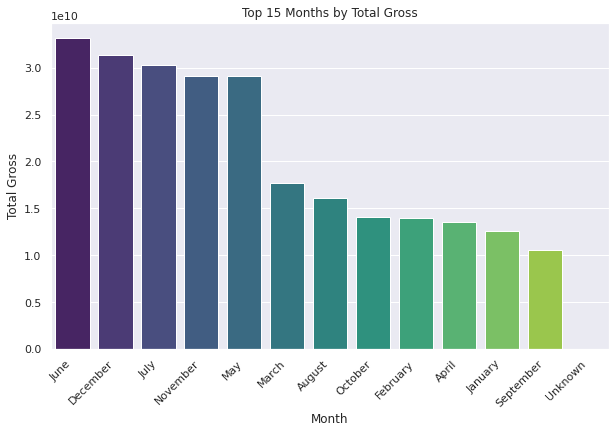

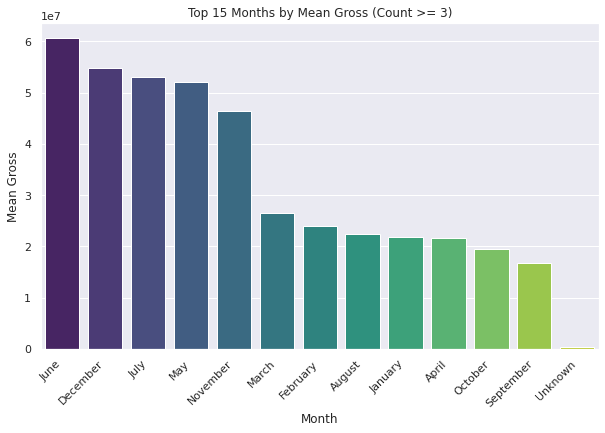

In [58]:
plot_top_mean_total_gross(df, 'month', top_n=15)

<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 15px;">
    
- **It looks like movies released either during the holiday season i.e. November (thanksgiving) and December (Christmas, new year etc.) or those released during late spring (May) and early to mid summer (June and July) tend to bring in the most gross revenue. Contributing factors could be things such as:**
    - people having time off, 
    - families getting together,
    - and kids being out of school  